<h1>Data Exploration</h1>
<p>In this notebook we will perform a broad data exploration on the <code>Boston</code> data set. Note that the aim of this exploration is not to be completely thorough; instead we would like to gain quick insights to help develop a first prototype. Upon analyzing the output of the prototype, we can analyze the data further to gain more insight.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%run ../../customModules/DataQualityReports.ipynb
# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<p>We first read the comma-separated values (csv) <code>Boston</code> file into a pandas DataFrame. To get a feeling for the data we display the top five rows of the DataFrame using the <code>head()</code> method and we show how many rows and columns the DataFrame has by using the <code>shape</code> attribute. We also show the <code>dtypes</code> attribute, which returns a pandas Series with the data type of each column.</p>

In [2]:
df = pd.read_csv("Boston.csv")
df.head()
df.shape
df.dtypes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


(506, 14)

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

<p>Is appears that all the columns have the data type we would expect. We can perform another check to see if any values are missing in the DataFrame using its <code>isnull</code> method.</p>

In [3]:
df[df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)].shape

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv


(0, 14)

<p>There are no obvious missing values in our data. So the next step to be able to produce the data quality reports with our custom <code>createDataQualityReports</code> function is to organize our DataFrame by quantitative and categorical variables using hierarchical indexing.</p>

In [4]:
# crim: per capita crime rate by town.
# zn: proportion of residential land zoned for lots over 25,000 sq.ft.
# indus: proportion of non-retail business acres per town.
# chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
# nox: nitrogen oxides concentration (parts per 10 million).
# rm: average number of rooms per dwelling.
# age: proportion of owner-occupied units built prior to 1940.
# dis: weighted mean of distances to five Boston employment centres.
# rad: index of accessibility to radial highways.
# tax: full-value property-tax rate per $10,000.
# ptratio: pupil-teacher ratio by town.
# black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
# lstat: lower status of the population (percent).
# medv: median value of owner-occupied homes in $1000s.

df.columns = pd.MultiIndex.from_tuples([('quantitative', 'crim'), ('quantitative', 'zn'), 
                          ('quantitative', 'indus'), ('categorical', 'chas'),
                         ('quantitative', 'nox'), ('quantitative', 'rm'), 
                        ('quantitative', 'age'), ('quantitative', 'dis'), 
                        ('quantitative', 'rad'), ('quantitative', 'tax'), 
                        ('quantitative', 'ptratio'), ('quantitative', 'black'), 
                        ('quantitative', 'lstat'), ('quantitative', 'medv')],
                        names=['type of variable', 'variable'])
df.head()

type of variable quantitative             categorical quantitative         \
variable                 crim    zn indus        chas          nox     rm   
0                     0.00632  18.0  2.31           0        0.538  6.575   
1                     0.02731   0.0  7.07           0        0.469  6.421   
2                     0.02729   0.0  7.07           0        0.469  7.185   
3                     0.03237   0.0  2.18           0        0.458  6.998   
4                     0.06905   0.0  2.18           0        0.458  7.147   

type of variable                                                     
variable           age     dis rad  tax ptratio   black lstat  medv  
0                 65.2  4.0900   1  296    15.3  396.90  4.98  24.0  
1                 78.9  4.9671   2  242    17.8  396.90  9.14  21.6  
2                 61.1  4.9671   2  242    17.8  392.83  4.03  34.7  
3                 45.8  6.0622   3  222    18.7  394.63  2.94  33.4  
4                 54.2  6.0622   3  222    18.7  396.90  5.33  36.2

<p>Now we can create the data quality reports.</p>

In [5]:
df_qr_quantitative, df_qr_categorical = createDataQualityReports(df)
'Quantitative Qualilty Report:'
df_qr_quantitative.round(2)
'Categorical Qualilty Report:'
df_qr_categorical.round(2)

'Quantitative Qualilty Report:'

,Count,Miss. (%),Card.,Min.,1st Qrt.,Mean,Median,3rd Qrt.,Max.,Std. Dev.
variable,,,,,,,,,,
crim,506,0.0,504,0.01,0.08,3.61,0.26,3.68,88.98,8.60
zn,506,0.0,26,0.00,0.00,11.36,0.00,12.50,100.00,23.32
indus,506,0.0,76,0.46,5.19,11.14,9.69,18.10,27.74,6.86
nox,506,0.0,81,0.38,0.45,0.55,0.54,0.62,0.87,0.12
rm,506,0.0,446,3.56,5.89,6.28,6.21,6.62,8.78,0.70
age,506,0.0,356,2.90,45.02,68.57,77.50,94.07,100.00,28.15
dis,506,0.0,412,1.13,2.10,3.80,3.21,5.19,12.13,2.11
rad,506,0.0,9,1.00,4.00,9.55,5.00,24.00,24.00,8.71
tax,506,0.0,66,187.00,279.00,408.24,330.00,666.00,711.00,168.54


'Categorical Qualilty Report:'

,Count,Miss. (%),Card.,Mode,Mode Freq.,Mode (%),2nd Mode,2nd Mode Freq.,2nd Mode (%)
variable,,,,,,,,,
chas,506,0.0,2,0,471,93.08,1,35,6.92


<p>To further gain insight into the data, we use the <code>plotQuantitativeVariables</code> and <code>plotCategoricalVariables</code> functions the produce the frequency plots for each (quantitative) variable.</p>

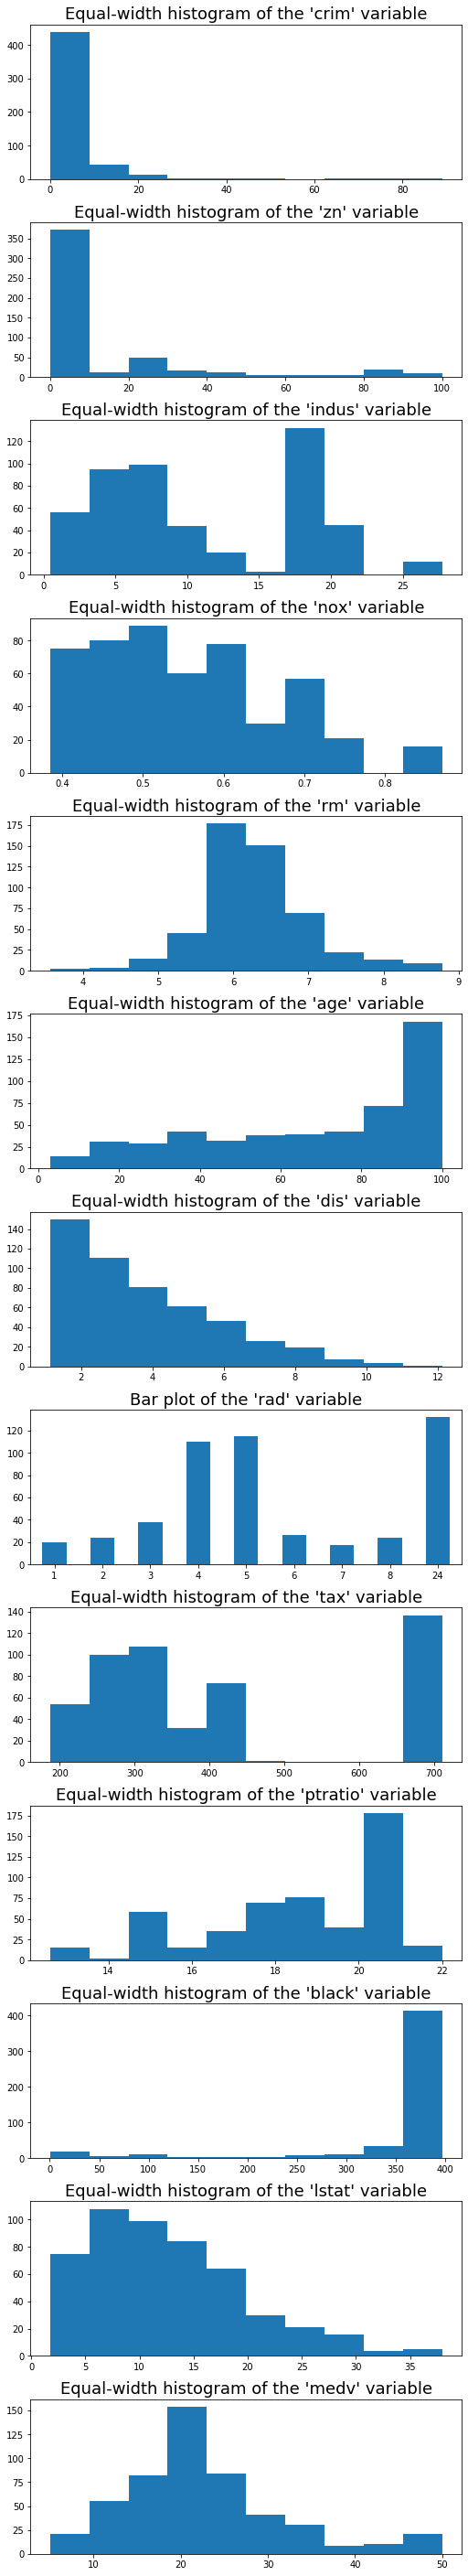

In [6]:
plotQuantitativeVariables(df.xs('quantitative', axis=1), height=3, width=7)

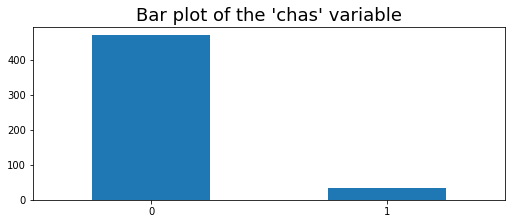

In [7]:
plotCategoricalVariables(df.xs('categorical', axis=1), height=3, width=7)

<p>We also compute the correlation matrix of the variables.</p>

In [8]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)